### Just a few suggestions to get your started

In [23]:
# Create an initially empty data frame with all the columns needed
# Here I'm just using columns for timestamp, type of expense, and amount
import pandas as pd

# add more as needed
expense_types = ['rent', 'utilities', 'food', 'transportation', 'entertainment', 'clothing', 'miscellaneous']

# By default these will all be float64, which is fine for amount but needs to be 
# changed for type and timestamp
df = pd.DataFrame(columns=['timestamp', 'type', 'amount'])

# Convert the 'timestamp' column to DateTime and normalize to remove time
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.normalize()

# Set the 'type' column to string type
df['type'] = df['type'].astype(str)

# Save as Excel file
df.to_excel('expenses.xlsx', index=False)

In [24]:
# simulate adding a expense
from datetime import datetime, timedelta

df = pd.read_excel('expenses.xlsx')  

# get the current date only 
date = datetime.now().date()
print(date)

2024-10-01


In [25]:
# this is just so I can get a few different dates for more entries
date2 = date - timedelta(days=1) # yesterday
date3 = date - timedelta(days=2) # two days ago
print(date2, date3)    

2024-09-30 2024-09-29


In [26]:
# add a new row to the dataframe with hardcoded values
# note that the dict values must be a 1 element list!\
row_dict = {'timestamp': [date3], 'type': ['entertainment'], 'amount': [20]}
df = pd.concat([df, pd.DataFrame(row_dict)], ignore_index=True)

row_dict = {'timestamp': [date2], 'type': ['food'], 'amount': [50]}
df = pd.concat([df, pd.DataFrame(row_dict)], ignore_index=True)

row_dict = {'timestamp': [date], 'type': ['rent'], 'amount': [1000]}
df = pd.concat([df, pd.DataFrame(row_dict)], ignore_index=True)

row_dict = {'timestamp': [date], 'type': ['food'], 'amount': [40]}
df = pd.concat([df, pd.DataFrame(row_dict)], ignore_index=True)

display(df)
# save the updated dataframe to the csv file
df.to_excel('expenses.xlsx', index=False)


,timestamp,type,amount
0,2024-09-29,entertainment,20
1,2024-09-30,food,50
2,2024-10-01,rent,1000
3,2024-10-01,food,40


In [ ]:
# Your turn: 
# add a expense but have the user type in the values using input()
# for timestamp, just use datetime.now().date() to get the current date
# for type, make sure it is one of the expense_types, so you will need to check the input
# and reprompt if it is not in the expense_types list
# for amount, you can assume that it's a valid input (i.e. no need to check if it's a number),
# however, you must convert the input() string to a float before adding it to the dataframe



In [27]:
# set spending limits for each type of expense per month
# I hardcode this here but it could be set by the user or read from a csv file

# create a dictionary to hold the limits
expense_limits = {}
expense_limits['rent'] = 1000
expense_limits['utilities'] = 200
expense_limits['food'] = 300
expense_limits['transportation'] = 100
expense_limits['entertainment'] = 50
expense_limits['clothing'] = 50
expense_limits['miscellaneous'] = 50

print(expense_limits)

{'rent': 1000, 'utilities': 200, 'food': 300, 'transportation': 100, 'entertainment': 50, 'clothing': 50, 'miscellaneous': 50}


In [ ]:
# copy your user expense entry here and then add the code to check if the expense 
# would be over the limit. This will require that you figure the total sum of expenses
# for each type. If the are over budget, just give a warning.

<Axes: xlabel='timestamp', ylabel='amount'>

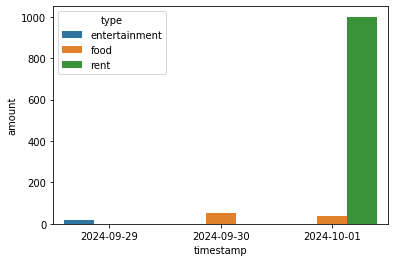

In [21]:
# Use seaborn to plot the data
# this is pretty simple and will eventually need to be customized
# to show the expense limits in some way

import seaborn as sns
import matplotlib.pyplot as plt

# read the data from the  file
df = pd.read_excel('expenses.xlsx')

# plot the data
sns.barplot(x='timestamp', y='amount', hue='type', data=df)